In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from utils import plot_coupling_grid

%matplotlib inline

In [2]:
monkeys = ['monkey1', 'monkey2', 'monkey3']
n_monkeys = len(monkeys)

In [3]:
results_paths = [os.path.join(os.environ['HOME'],
                              'fits/uoineuro/coupling/' + monkey + '.h5')
                 for monkey in monkeys]

In [4]:
fits = [h5py.File(results_paths[idx], 'r')
        for idx in range(n_monkeys)]

In [5]:
baselines = [fits[idx]['glmnet_poisson'] for idx in range(n_monkeys)]
algorithms = [[fits[idx]['uoi_poisson_log'], fits[idx]['uoi_poisson_AIC'], fits[idx]['uoi_poisson_BIC']]
              for idx in range(n_monkeys)]

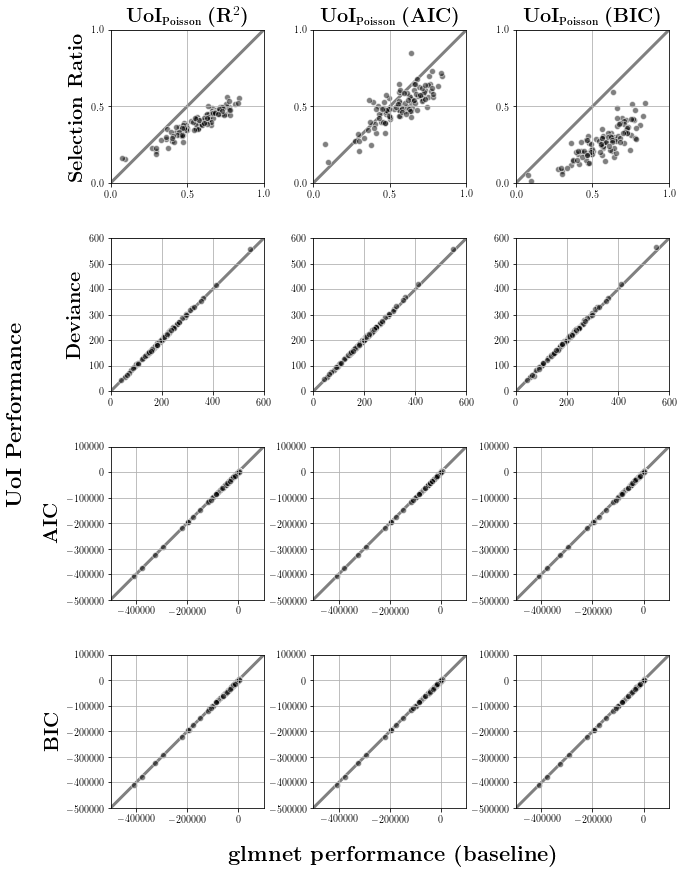

In [10]:
fig, axes = plot_coupling_grid(baseline_group=baselines[0],
                               fits_groups=algorithms[0],
                               metrics=['selection_ratio', 'deviances_test', 'AICs', 'BICs'])

# additional customizations #

# first row: selection ratio
for idx in range(3):
    ax = axes[0, idx]
    ax.set_xlim([0, 1])
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    ax.grid('on')

# second row: r2
for idx in range(3):
    ax = axes[1, idx]
    ax.set_xlim([0, 600])
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.grid('on')

# third row: AIC
for idx in range(3):
    ax = axes[2, idx]
    ax.set_xlim([-500000, 100000])
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.grid('on')
    
# third row: BIC
for idx in range(3):
    ax = axes[3, idx]
    ax.set_xlim([-500000, 100000])
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.grid('on')

axes[0, 0].set_ylabel(r'\textbf{Selection Ratio}', fontsize=20)
axes[1, 0].set_ylabel(r'\textbf{Deviance}', fontsize=20)
axes[2, 0].set_ylabel(r'\textbf{AIC}', fontsize=20)
axes[3, 0].set_ylabel(r'\textbf{BIC}', fontsize=20)


axes[0, 0].set_title(r'\textbf{UoI}$_{\normalsize\textbf{Poisson}}$ \textbf{(}$\mathbf{R}^2$\textbf{)}',
                     fontsize=20)
axes[0, 1].set_title(r'\textbf{UoI}$_{\normalsize\textbf{Poisson}}$ \textbf{(AIC)}',
                     fontsize=20)
axes[0, 2].set_title(r'\textbf{UoI}$_{\normalsize\textbf{Poisson}}$ \textbf{(BIC)}',
                     fontsize=20)

fig.text(
    x=0.55, y=-0.01,
    s=r'\textbf{glmnet performance (baseline)}',
    fontsize=22,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.03, y=0.5,
    s=r'\textbf{UoI Performance}',
    fontsize=22,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()